In [2]:
import os
os.getcwd()

'/Users/francopiccolo/GitHub/completion-rate-prediction/notebooks'

In [3]:
os.chdir('../')
os.getcwd()

'/Users/francopiccolo/GitHub/completion-rate-prediction'

In [4]:
import pandas as pd

In [5]:
# Data load
df = pd.read_csv('./flask/data/completion_rate.csv')

In [6]:
df.shape

(1031284, 50)

In [7]:
df.head()

,form_id,views,submissions,feat_01,feat_02,feat_03,feat_04,feat_05,feat_06,feat_07,...,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47
0,1113027,33,27,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,2.0
1,1115313,147,111,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1115907,528,136,0.0,1.0,0.0,0.0,1.0,0.0,6.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,30.0
3,1116299,55,21,0.0,2.0,0.0,0.0,0.0,1.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0
4,1120373,62,54,0.0,0.0,0.0,0.0,1.0,0.0,4.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,11.0,7.0,21.0


In [50]:
df['completion_rate'] = df['submissions'] / df['views']

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031284 entries, 0 to 1031283
Data columns (total 50 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   form_id      1031284 non-null  int64  
 1   views        1031284 non-null  int64  
 2   submissions  1031284 non-null  int64  
 3   feat_01      1031284 non-null  float64
 4   feat_02      1031284 non-null  float64
 5   feat_03      1031284 non-null  float64
 6   feat_04      1031284 non-null  float64
 7   feat_05      1031284 non-null  float64
 8   feat_06      1031284 non-null  float64
 9   feat_07      1031284 non-null  float64
 10  feat_08      1031284 non-null  float64
 11  feat_09      1031284 non-null  float64
 12  feat_10      1031284 non-null  float64
 13  feat_11      1031284 non-null  float64
 14  feat_12      1031284 non-null  float64
 15  feat_13      1031284 non-null  float64
 16  feat_14      1031284 non-null  float64
 17  feat_15      1031284 non-null  float64
 18  fe

In [35]:
features = [col for col in df.columns if col.startswith('feat')]

In [15]:
df.describe().applymap(lambda x: '%.1f' % x)

,form_id,views,submissions,feat_01,feat_02,feat_03,feat_04,feat_05,feat_06,feat_07,...,feat_38,feat_39,feat_40,feat_41,feat_42,feat_43,feat_44,feat_45,feat_46,feat_47
count,1031284.0,1031284.0,1031284.0,1031284.0,1031284.0,1031284.0,1031284.0,1031284.0,1031284.0,1031284.0,...,1031284.0,1031284.0,1031284.0,1031284.0,1031284.0,1031284.0,1031284.0,1031284.0,1031284.0,1031284.0
mean,7987444.0,939.6,322.4,0.2,0.4,0.1,0.0,0.1,0.2,0.9,...,0.2,0.1,0.2,0.2,0.3,0.3,0.0,0.8,0.6,4.5
std,3965055.9,26748.7,8507.7,0.4,0.9,0.4,0.0,0.5,0.9,1.9,...,1.3,0.4,1.2,0.8,0.6,0.6,0.3,4.3,6.0,10.9
min,225513.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,3849671.2,36.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,9887946.0,79.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,11494345.2,226.0,90.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0
max,13501001.0,12267178.0,6754385.0,1.0,55.0,78.0,5.0,87.0,96.0,124.0,...,105.0,46.0,100.0,135.0,87.0,87.0,87.0,590.0,2065.0,1145.0


In [16]:
df.nunique()

form_id        1031284
views            18927
submissions      11707
feat_01              2
feat_02             46
feat_03             44
feat_04              5
feat_05             38
feat_06             59
feat_07             79
feat_08             14
feat_09             62
feat_10             12
feat_11             32
feat_12             30
feat_13             22
feat_14             51
feat_15             12
feat_16             69
feat_17             56
feat_18             39
feat_19             75
feat_20              2
feat_21            155
feat_22             78
feat_23            119
feat_24             28
feat_25             66
feat_26             32
feat_27             38
feat_28             38
feat_29             41
feat_30             74
feat_31             26
feat_32             27
feat_33             83
feat_34             59
feat_35             18
feat_36             72
feat_37             60
feat_38             72
feat_39             38
feat_40             69
feat_41    

In [18]:
df.isna().sum()

form_id        0
views          0
submissions    0
feat_01        0
feat_02        0
feat_03        0
feat_04        0
feat_05        0
feat_06        0
feat_07        0
feat_08        0
feat_09        0
feat_10        0
feat_11        0
feat_12        0
feat_13        0
feat_14        0
feat_15        0
feat_16        0
feat_17        0
feat_18        0
feat_19        0
feat_20        0
feat_21        0
feat_22        0
feat_23        0
feat_24        0
feat_25        0
feat_26        0
feat_27        0
feat_28        0
feat_29        0
feat_30        0
feat_31        0
feat_32        0
feat_33        0
feat_34        0
feat_35        0
feat_36        0
feat_37        0
feat_38        0
feat_39        0
feat_40        0
feat_41        0
feat_42        0
feat_43        0
feat_44        0
feat_45        0
feat_46        0
feat_47        0
dtype: int64

<AxesSubplot:>

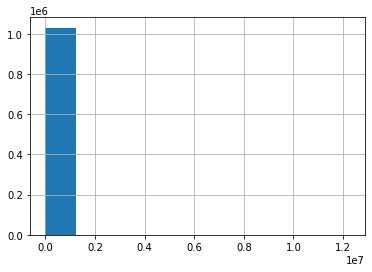

In [52]:
df['views'].hist()

<AxesSubplot:>

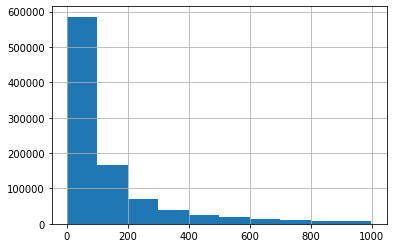

In [55]:
df['views'][df['views'] < 1000].hist()

<AxesSubplot:>

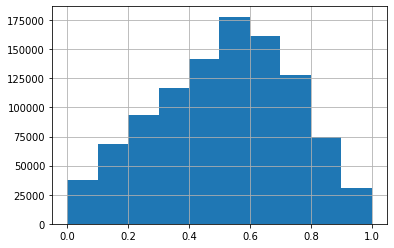

In [51]:
df['completion_rate'].hist()

In [59]:
df_corr = df.corr()

<AxesSubplot:>

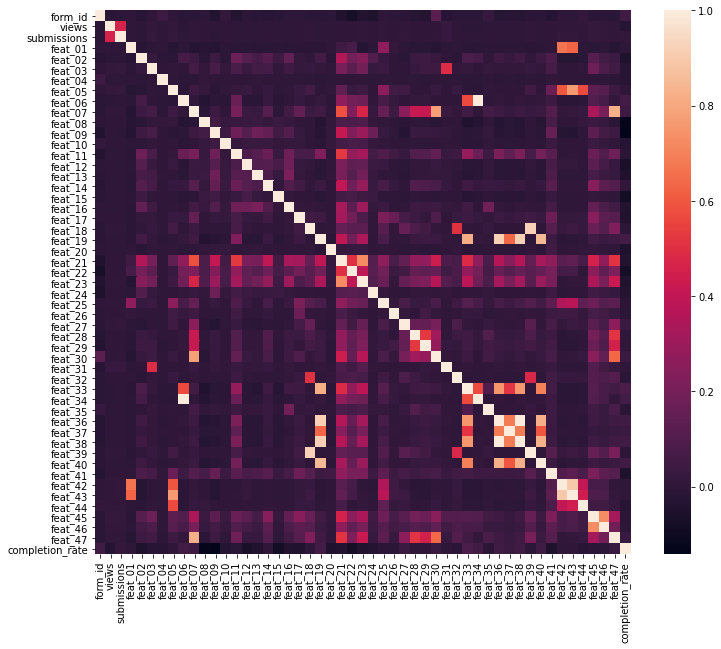

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 10))         
sns.heatmap(df_corr, ax=ax)

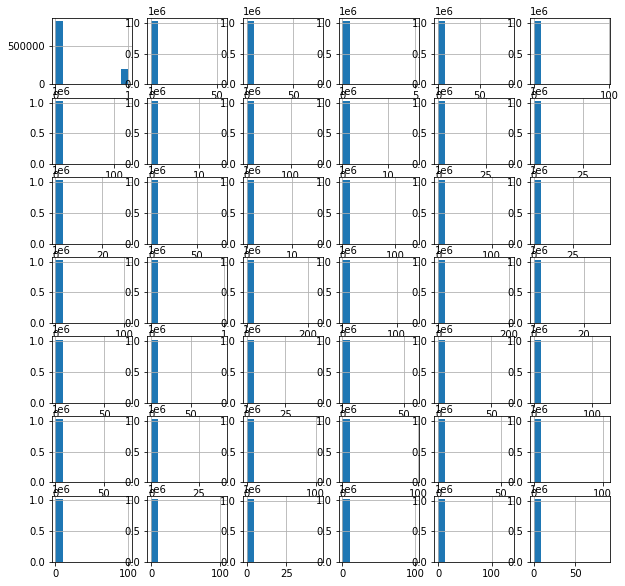

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(7, 6, figsize=(10, 10))
f = 0
for i in range(7):
    for j in range(6):    
        df[features[f]].hist(ax=axs[i, j])
        f += 1

# Presence of outliers is evident in most variables, but I wont
# remove them without business knowledge about them.

<AxesSubplot:>

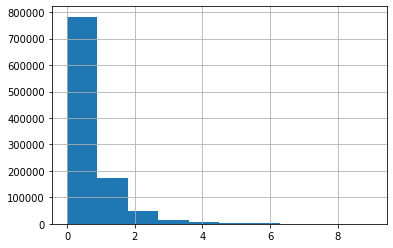

In [72]:
df['feat_02'][df['feat_02']<10].hist()
# For example most observations in feature 2 happen before 10.

In [20]:
# Sparsity
(df.values == 0).sum()/df.size

0.7817589814365051